
Experiment 3

Roll.No: 20EC39002, 20EC39054

Group: 6



In [ ]:
import cmath
import numpy as np
from math import log, ceil
import matplotlib.pyplot as plt

def w(p, q):
   ''' The w term in DFT and IDFT formulas'''
   return cmath.exp((2.0 * cmath.pi * 1j * q) / p)

def pad(lst):
   '''padding the list to next nearest power of 2 as FFT implemented is radix 2'''
   k = 0
   while 2**k < len(lst):
      k += 1
   return np.concatenate((lst, ([0] * (2 ** k - len(lst)))))

def fft(x):
   ''' FFT of 1-d signals
   usage : X = fft(x)
   where input x = list containing sequences of a discrete time signals
   and output X = dft of x '''

   n = len(x)
   if n == 1:
      return x
   Feven, Fodd = fft(x[0::2]), fft(x[1::2])
   combined = [0] * n
   for m in range(int(n/2)):
     combined[m] = Feven[m] + w(n, -m) * Fodd[m]
     combined[m + int(n/2)] = Feven[m] - w(n, -m) * Fodd[m]
   return combined

def ifft(X):
   ''' IFFT of 1-d signals
   usage x = ifft(X)
   unpadding must be done implicitly'''

   x = fft([x.conjugate() for x in X])
   return [x.conjugate()/len(X) for x in x]

def pad2(x):
   m, n = np.shape(x)
   M, N = 2 ** int(ceil(log(m, 2))), 2 ** int(ceil(log(n, 2)))
   F = np.zeros((M,N), dtype = x.dtype)
   F[0:m, 0:n] = x
   return F, m, n

def fft2(f):
   '''FFT of 2-d signals/images with padding
   usage X, m, n = fft2(x), where m and n are dimensions of original signal'''

   f, m, n = pad2(f)
   return np.transpose(fft(np.transpose(fft(f)))), m, n

def ifft2(F, m, n):
   ''' IFFT of 2-d signals
   usage x = ifft2(X, m, n) with unpaded,
   where m and n are odimensions of original signal before padding'''

   f, M, N = fft2(np.conj(F))
   f = np.matrix(np.real(np.conj(f)))/(M*N)
   return f[0:m, 0:n]

def fftshift(F):
   ''' this shifts the centre of FFT of images/2-d signals'''
   M, N = F.shape
   R1, R2 = F[0: int(M/2), 0: int(N/2)], F[int(M/2): M, 0: int(N/2)]
   R3, R4 = F[0: int(M/2), int(N/2): N], F[int(M/2): M, int(N/2): N]
   sF = np.zeros(F.shape,dtype = F.dtype)
   sF[int(M/2): M, int(N/2): N], sF[0: int(M/2), 0: int(N/2)] = R1, R4
   sF[int(M/2): M, 0: int(N/2)], sF[0: int(M/2), int(N/2): N]= R3, R2
   return sF



In [ ]:
from PIL import Image

def img_read(filename):
  # return pixel matrix of image file
  img = Image.open(filename)
  n = img.size[0]
  pixel_data = np.array(list(img.getdata()))
  pixel_data = pixel_data.reshape((n, n))
  # print(bmp_img)
  plt.matshow(pixel_data, cmap = 'gray')
  return pixel_data

In [42]:
# Q.1


def vis_mag_phase(pixel_mat, out_name):
  res_fft, m, n = fft2(pixel_mat)
  shift_fft = fftshift(res_fft)
  mag = np.log(1+np.abs(shift_fft))
  # print(mag)
  plt.matshow(mag, cmap = 'gray')
  plt.imsave(out_name[:-4] + "_magnitude.bmp", mag, cmap='gray', format='bmp')
  phase = np.angle(shift_fft) + np.pi
  phase /= 2*np.pi
  plt.matshow(phase, cmap='gray', vmin=0.0, vmax=1.0)
  plt.imsave(out_name[:-4] + "_phase.bmp", phase, cmap='gray', format='bmp')
  # print(phase)


Input for Question: 1

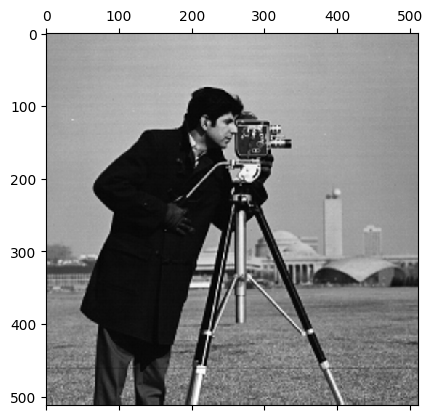

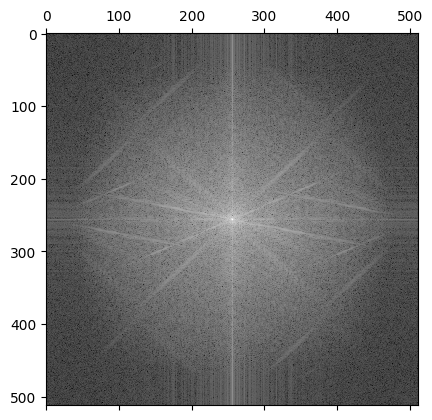

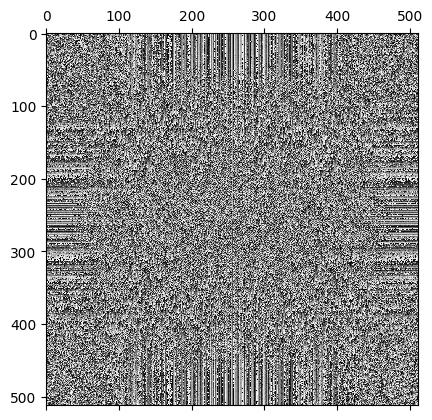

In [43]:
filename = "cameraman.jpg"
vis_mag_phase(img_read(filename), filename)

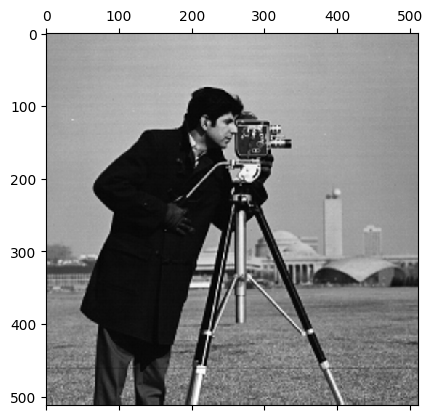

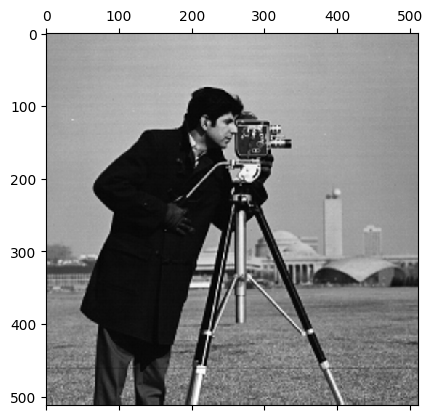

In [ ]:
# testing inverse fft(iFFT)
pixd = img_read(filename)
fft_res, m, n = fft2(pixd)
plt.matshow(ifft2(fft_res, m, n), cmap='gray')

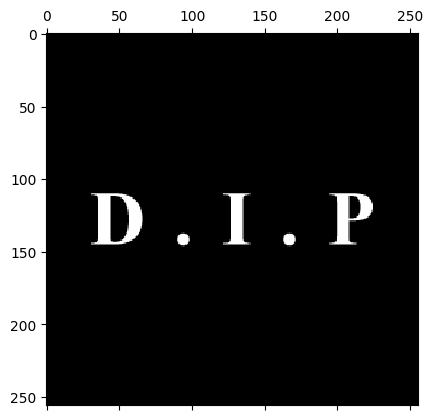

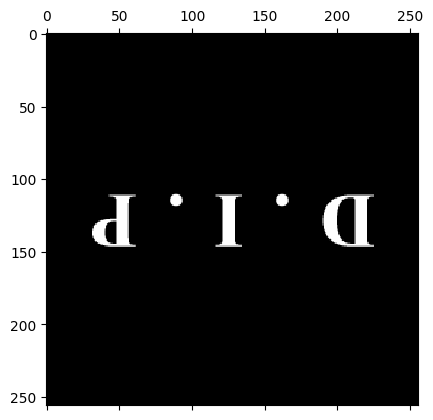

In [45]:
# Q.2

filename = "dip.tif"                      # input filename with extension ex. "dip.tif"
img_mat = img_read(filename)
n = img_mat.shape[0]
# 1. multiply image by (-1)^(x+y)
for i in range(n):
  for j in range(n):
    if (i+j)%2 == 0:
      k = 1
    else:
      k = -1
    img_mat[i, j] = img_mat[i, j] * k

# 2. Compute FFT
new_fft, m, n = fft2(img_mat)

# 3. Compute complex conjugate of FFT
conj_fft = np.conj(new_fft)

# 4. Compute inverse FFT
inv_conj_fft = ifft2(conj_fft, m, n)

# 5. Multiple real part of the result by (-1)^(x+y)
for i in range(n):
  for j in range(n):
    if (i+j)%2 == 0:
      k = 1
    else:
      k = -1
    inv_conj_fft[i, j] = inv_conj_fft[i, j] * k

# print(inv_conj_fft)
plt.matshow(inv_conj_fft, cmap = 'gray')
plt.imsave("Ques_2_output.bmp", inv_conj_fft, cmap='gray', format='bmp')
